In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import functions to perform scaling and normalization
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler

import statsmodels
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

# import various functions from sklearn 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 

In [2]:
df = pd.read_csv('data_eda_1.csv',index_col=0)
df.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,AdjustmentsToCreditRating,ChildrenInHH_Yes,HandsetRefurbished_Yes,HandsetWebCapable_Yes,TruckOwner_Yes,RVOwner_Yes,Homeownership_Unknown,BuysViaMailOrder_Yes,RespondsToMailOffers_Yes,OptOutMailings_Yes,NonUSTravel_Yes,OwnsComputer_Yes,HasCreditCard_Yes,NewCellphoneUser_Yes,IncomeGroup_Low income,IncomeGroup_Medium income,OwnsMotorcycle_Yes,MadeCallToRetentionTeam_Yes,CreditRating_Low,CreditRating_Medium,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,Occupation_Professional,New_maritalstatus_Yes
0,1,-1.089034,-0.422798,-1.125036,-0.044197,-0.995504,-0.621914,-0.566549,-0.450622,-0.889336,-0.306586,-0.568253,-0.824996,-0.604886,0.460593,-1.610162,-1.182049,0.012439,-0.218215,-0.899446,-0.068108,-0.150674,2.477643,1.165226,-0.581885,0.807270,1.119678,0.107745,1.172978,-0.940475,5.452813,-0.132239,-0.221591,-0.192672,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0
1,1,-1.556158,-1.937776,-1.450779,-0.912074,-0.995504,-0.621914,0.018886,0.088432,-1.200278,-1.216280,-1.013639,-0.824996,-0.604886,-1.600850,-1.610162,-1.182049,-1.319026,-1.537118,-1.429573,-0.068108,-0.897074,2.388088,-0.760155,-0.581885,0.807270,-0.767089,3.053676,0.489551,1.056411,-0.183392,-0.132239,-0.221591,-0.192672,1,0,0,0,0,0,1,1,0,0,1,1,1,0,1,0,0,0,1,0,1,0,1,1
2,0,-0.420564,-1.998448,-0.272519,-0.912074,-0.995504,-0.621914,0.026624,0.088432,-1.515686,-1.216280,-1.760480,-0.824996,-0.604886,-1.495143,-1.466096,-1.182049,-1.665568,-1.154741,-1.675080,-0.068108,-0.897074,2.448340,-0.760155,-0.581885,-0.850485,-0.767089,3.614747,-0.022125,0.852418,-0.183392,-0.132239,-0.221591,-0.192672,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,1,1
3,0,0.826362,1.392611,1.180063,1.170112,-0.995504,-0.621914,0.655061,0.284291,2.228625,1.290204,1.349529,1.501970,1.946418,0.941048,2.908416,2.064116,2.505608,1.813093,2.044460,-0.068108,1.849625,2.418494,1.165226,1.348420,1.895246,1.700472,0.466880,0.132730,-0.940475,-0.183392,-0.132239,-0.221591,-0.192672,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0
4,1,-1.544648,-2.469987,-1.450779,-0.912074,-0.995504,-0.621914,0.034384,0.083251,-1.515686,-1.216280,-1.760480,-0.824996,-0.604886,-1.600850,-1.610162,-1.182049,-1.898531,-1.807759,-1.675080,-0.068108,-0.897074,2.226882,1.165226,1.348420,1.594044,1.552675,1.628558,0.687544,1.160087,-0.183392,-0.132239,-0.221591,5.190155,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1


## Split the dependent and independent variables

In [3]:
# store the target variable 'Loan Status' in a dataframe 'df_target'
df_target = df['Churn']

# store all the independent variables in a dataframe 'df_feature' 
# drop the column 'Loan Status' using drop()
# 'axis = 1' drops the specified column
df_features = df.drop('Churn', axis = 1)

## Train Test Split

In [4]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
x_train, x_test ,y_train ,y_test = train_test_split(df_features,df_target, random_state=0, test_size=0.30)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('x_train: ',x_train.shape)
print('y_train: ',y_train.shape)

# print dimension of test set
print('x_test: ',x_test.shape)
print('y_test: ',y_test.shape)

x_train:  (35475, 57)
y_train:  (35475,)
x_test:  (15204, 57)
y_test:  (15204,)


#### Create a generalized function to calculate the performance metrics for the test set

In [5]:
# create a generalized function to calculate the performance metrics values for test set
def get_test_report(model, test_data):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(test_data)

    # return the classification report for test data
    return(classification_report(y_test, test_pred))

### Define a function to plot the confusion matrix.

In [6]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model, test_data):
    
    # predict the target values using X_test
    y_pred = model.predict(test_data)
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

### Define a function to plot the ROC curve

In [7]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model, test_data):
    
    # predict the probability of target variable using X_test
    # consider the probability of positive class by subsetting with '[:,1]'
    y_pred_prob = model.predict_proba(test_data)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve for Cancer Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

# 3. K Nearest Neighbors (KNN)

KNN is a classification machine learning algorithm used to identify the class of the observation. This algorithm search for K nearest points to determine the class of an observation. To identify the nearest points, it considers the distance metrics like Euclidean, Manhattan, Chebyshev, Hamming, and so on.

#### Build a knn model on a training dataset using euclidean distance (Standardized Data)

In [8]:
# instantiate the 'KNeighborsClassifier'
# n_neighnors: number of neighbors to consider
# default metric is minkowski, and with p=2 it is equivalent to the euclidean metric
knn_classification = KNeighborsClassifier(n_neighbors = 3)

# fit the model using fit() on train data
knn_model = knn_classification.fit(x_train, y_train)

### Build a confusion matrix.

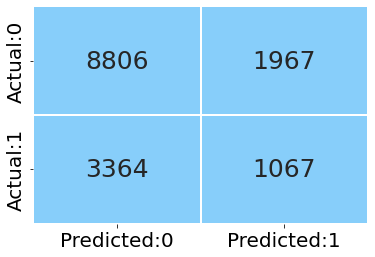

In [9]:
# call the function to plot the confusion matrix
# pass the knn model to the function
plot_confusion_matrix(knn_model, test_data = x_test)

#### Calculate performance measures on the test set

In [10]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the knn model to the function
test_report = get_test_report(knn_model, test_data =x_test)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.72      0.82      0.77     10773
           1       0.35      0.24      0.29      4431

    accuracy                           0.65     15204
   macro avg       0.54      0.53      0.53     15204
weighted avg       0.62      0.65      0.63     15204



Interpretation: The accuracy is 66% for this model.

#### Plot the ROC curve.

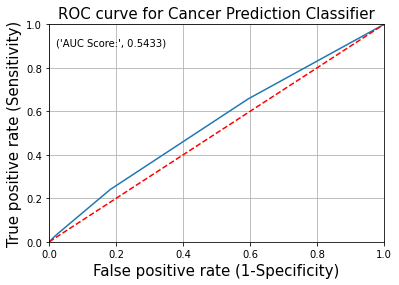

In [11]:
# call the function to plot the ROC curve
# pass the knn model to the function
plot_roc(knn_model, test_data = x_test)

Interpretation: The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

# 3.1 Optimal Value of K (using GridSearchCV)

In [12]:
import time 

In [13]:
%%time
# create a dictionary with hyperparameters and its values
# n_neighnors: number of neighbors to consider
# usually, we consider the odd value of 'n_neighnors' to avoid the equal number of nearest points with more than one class
# pass the different distance metrics to the parameter, 'metric'
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
 
# instantiate the 'KNeighborsClassifier' 
knn_classification = KNeighborsClassifier()


knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')

# fit the model on X_train and y_train using fit()
knn_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'euclidean', 'n_neighbors': 23} 

CPU times: total: 1h 21min 30s
Wall time: 1h 21min 39s


In [14]:
knn_class = KNeighborsClassifier(n_neighbors = 23)
knn_model_1 = knn_class.fit(x_train, y_train)

In [15]:
test_report = get_test_report(knn_model_1, test_data = x_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.72      0.97      0.82     10773
           1       0.46      0.06      0.11      4431

    accuracy                           0.71     15204
   macro avg       0.59      0.52      0.46     15204
weighted avg       0.64      0.71      0.61     15204



In [16]:
knn_model_1.score(x_train,y_train)

0.7240028188865398

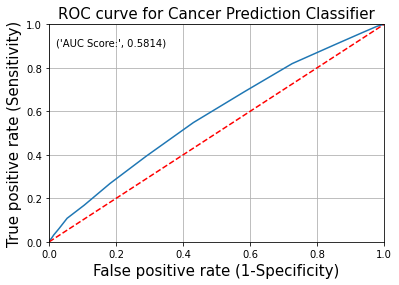

In [17]:
plot_roc(knn_model_1, test_data = x_test)

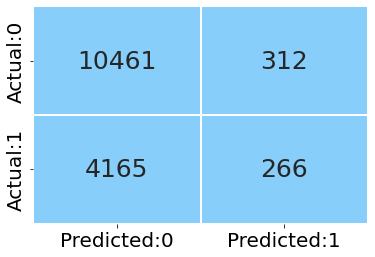

In [18]:
plot_confusion_matrix(knn_model_1, test_data = x_test)

##### Draw a line plot to see the error rate for each value of K using manhattan distance as a metric of KNN model

In [23]:
import time

In [30]:
%%time
# consider an empty list to store error rate
error_rate = []

# use for loop to build a knn model for each K
for i in np.arange(1,25,2):
    
    # setup a knn classifier with k neighbors
    # use the 'euclidean' metric 
    knn = KNeighborsClassifier(i, metric = 'manhattan')
   
    # fit the model using 'cross_val_score'
    # pass the knn model as 'estimator'
    # use 5-fold cross validation
    score = cross_val_score(knn_grid, x_train, y_train, cv = 5)
    
    # calculate the mean score
    score = score.mean()
    
    # compute error rate 
    error_rate.append(1 - score)

# plot the error_rate for different values of K 
plt.plot(range(1,25,2), error_rate)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Error Rate', fontsize = 15)
plt.xlabel('K', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)

# set the x-axis labels
plt.xticks(np.arange(1, 25, step = 2))

# plot a vertical line across the minimum error rate
plt.axvline(x = 7, color = 'red')

# display the plot
plt.show()

Interpretation: We can see that the optimal value of K (= 7) obtained from the GridSearchCV() results in a lowest error rate.

#### Calculate performance measures on the test set.

In [31]:
# print the performance measures for test set for the model with best parameters
call the function 'get_test_report'
# pass the knn model using GridSearch to the function
print('Classification Report for test set: \n', get_test_report(knn_grid, test_data=x_test))

### Plot the ROC curve.

In [ ]:
# call the function to plot the ROC curve
# pass the knn model to the function
plot_roc(knn_grid, test_data=x_test)

# 4. Naive Bayes Algorithm

It uses a Bayes' Theorem with the assumption of independence of predictor variables. The sklearn library provides different naive bayes classifiers, as GaussianNB, MultinomialNB and so on.

##### Build a naive bayes model on a training dataset.

In [19]:
# instantiate the 'GaussianNB'
gnb = GaussianNB()

# fit the model using fit() on train data
gnb_model = gnb.fit(x_train, y_train)

#### Build a confusion matrix.

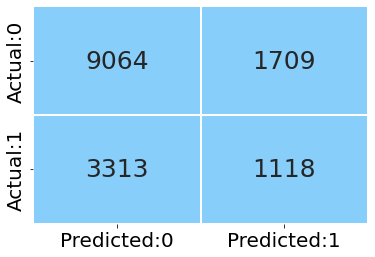

In [20]:
# call the function to plot the confusion matrix
# pass the gaussian naive bayes model to the function
plot_confusion_matrix(gnb_model, test_data=x_test)

##### Calculate performance measures on the test set.

In [21]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the gaussian naive bayes model to the function
test_report = get_test_report(gnb_model, test_data=x_test)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.73      0.84      0.78     10773
           1       0.40      0.25      0.31      4431

    accuracy                           0.67     15204
   macro avg       0.56      0.55      0.55     15204
weighted avg       0.63      0.67      0.64     15204



In [22]:
gnb_model.score(x_train,y_train)

0.6754897815362931

#### Plot the ROC curve.

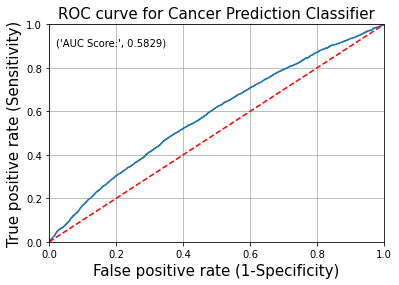

In [23]:
# call the function to plot the ROC curve
# pass the gaussian naive bayes model to the function
plot_roc(gnb_model, test_data=x_test)

Interpretation: From the above plot, we can see that our classifier (gnb_model) is away from the red dotted line; with the AUC score 0.581

Note: Algorithms like Naive Bayes and tree based algorithms do not need feature scaling or normalization. Performing a features scaling in these algorithms may not have much effect.

### 3.3.1 Tune the Hyperparameters (GridSearchCV)

In [24]:
import time

In [25]:
%%time
# create a dictionary with hyperparameters and its values
# learning_rate: pass the list of boosting learning rates
# max_depth: pass the range of values as the maximum tree depth for base learners
# gamma: pass the list of minimum loss reduction values required to make a further partition on a leaf node of the tree
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3],
                     'max_depth': range(3,10),
                     'min_child_weight':range(1,5),
                     'gamma': [ 1, 2, 3],
                     'subsample':[0.25,0.5,1],
                    }


# instantiate the 'XGBClassifier' 
gnb_model = GaussianNB()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
gnb_grid = GridSearchCV(estimator = gnb_model, param_grid = tuning_parameters, cv = 5, scoring = 'recall')

# fit the model on X_train and y_train using fit()
gnb_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for gnb: ', gnb_grid.best_params_, '\n')

#### Build the model using the tuned hyperparameters.

In [27]:
#learning_rate = xgb_grid.best_params_.get('learning_rate'),
                              # max_depth = xgb_grid.best_params_.get('max_depth'),
                              #gamma = xgb_grid.best_params_.get('gamma'),
                              #tree_method=xgb_grid.best_params_.get('tree_method'),
                              #subsample=xgb_grid.best_params_.get('subsample'),
                              #colsample_bytree=xgb_grid.best_params_.get('colsample_bytree')

# instantiate the 'XGBClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
gnb_model1 = GaussianNB( )



# use fit() to fit the model on the train set            
gnb_model = gnb_model1.fit(x_train, y_train)

# print the performance measures for test set for the model with best parameters
print('Classification Report for test set:\n', get_test_report(gnb_model,test_data=x_test))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.73      0.84      0.78     10773
           1       0.40      0.25      0.31      4431

    accuracy                           0.67     15204
   macro avg       0.56      0.55      0.55     15204
weighted avg       0.63      0.67      0.64     15204



In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
scores=cross_val_score(gnb_model,x_train,y_train,scoring='recall')
np.mean(scores)

0.2407661013106764

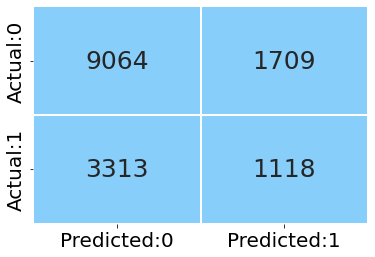

In [35]:
y_pred=gnb_model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [36]:
gnb_model.score(x_train,y_train)

0.6754897815362931

In [37]:
gnb_model.score(x_test,y_test)

0.6696921862667718

# 5. Comparison between KNN Model and Naive Bayes Model

In [ ]:
# y_pred and y_pred_prob is differ

In [ ]:
# K Nearest Neighbors
y_pred_prob_knn = knn_grid.predict_proba(x_test)[:,1]
    
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_knn)

# add the AUC score to the plot
auc_score_knn = roc_auc_score(y_test, y_pred_prob_knn)

# plot the ROC curve
plt.plot(fpr, tpr, label='KNN Model (AUC Score = %0.4f)' % auc_score_knn)

# Gaussian Naive Bayes
y_pred_prob_gnb = gnb_model.predict_proba(x_test)[:,1]
    
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_gnb)

# add the AUC score to the plot
auc_score_gnb = roc_auc_score(y_test, y_pred_prob_gnb)

# plot the ROC curve
plt.plot(fpr, tpr, label='GNB Model (AUC Score = %0.4f)' % auc_score_gnb)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('GNB Model Vs. KNN Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# set the position of legend
plt.legend(loc = 'lower right')

# plot the grid
plt.grid(True)

Interpretation: The Auc Score of KNN Model is slightly higher than that of Gaussian Naive Bayes model. Also KNN model is more stable than Gaussian Naive Bayes model.